

## 1. Heston One-Factor Model for Stochastic Volatility

The Heston model is a popular stochastic volatility model used in quantitative finance. Its main feature is that it allows the volatility (or variance) of the asset to be random while keeping it nonnegative. The dynamics are described by two stochastic differential equations (SDEs):

1. **Asset Price Equation**  
   The asset price \( S(t) \) follows:  
   $$
   dS(t) = S(t)\, r(t)\, dt + S(t)\, \sqrt{v(t)}\, dW_S(t)
   $$
   where:  
   - \( r(t) \) is the instantaneous short rate,
   - \( v(t) \) is the instantaneous variance,
   - \( dW_S(t) \) is a Brownian motion which may be correlated with the volatility driver.

2. **Variance Process Equation (CIR Process)**  
   The variance \( v(t) \) is modeled using a Cox–Ingersoll–Ross (CIR) process:  
   $$
   dv(t) = \kappa \left( \bar{v} - v(t) \right) dt + \gamma\, \sqrt{v(t)}\, dW_v(t)
   $$
   where:  
   - \( \kappa \) is the rate of mean reversion,
   - \( \bar{v} \) is the long-term mean level of variance,
   - \( \gamma \) is the volatility of variance (vol of vol),
   - \( dW_v(t) \) is another Brownian motion,
   - The non-negativity of \( v(t) \) is ensured by the specific structure of the CIR process.

*Quant Connection:*  
In practice, the Heston model is widely used for pricing options as it can capture the volatility smile observed in market prices. The characteristic function of \( \ln S(t) \) is derived in closed form using these processes, which is fundamental for Fourier-based pricing techniques.

---

## 2. Hull–White Model for Stochastic Interest Rates

The Hull–White model is used to model the short rate \( r(t) \) under a mean-reverting process. Its dynamics are given by:
$$
dr(t) = \lambda \left( \theta(t) - r(t) \right) dt + \eta\, dW_r(t)
$$
where:
- \( \lambda \) is the mean reversion speed,
- \( \theta(t) \) is a time-dependent function chosen to fit the initial yield curve,
- \( \eta \) is the volatility of the short rate,
- \( dW_r(t) \) is a Brownian motion.

The initial forward rate is estimated via the zero-coupon bond price function \( P(0, T) \) as:
$$
f(0,T) = -\frac{d \ln P(0, T)}{dT}
$$  
and the function \( \theta(t) \) is computed (using numerical differentiation) as:
$$
\theta(t) = \frac{1}{\lambda}\,\frac{d f(0,t)}{dt} + f(0,t) + \frac{\eta^2}{2\lambda^2}\left(1 - e^{-2\lambda t}\right)
$$

*Quant Connection:*  
The Hull–White model allows for a flexible calibration to the current term structure of interest rates, making it especially useful for pricing interest rate derivatives and structured products.

---

## 3. Hybrid Simulation: AES and Monte Carlo (MC) Paths

Your code implements two different simulation approaches for the combined Heston–Hull–White hybrid model:

### 3.1. AES (Advanced Exact Simulation) Paths

- **Variance Sampling:** The code uses an exact simulation technique for the CIR process with:  
  $$
  v(t+\Delta t) = c\, \chi^2\left(\delta, \kappaBar\right)
  $$
  where:
  - \( \delta = \frac{4\kappa \bar{v}}{\gamma^2} \),
  - \( c = \frac{\gamma^2 (1 - e^{-\kappa \Delta t})}{4\kappa} \),
  - \( \kappaBar = \frac{4\kappa\, v(t)\, e^{-\kappa \Delta t}}{\gamma^2\left(1 - e^{-\kappa \Delta t}\right)} \).

- **Interest Rate & Asset Price Updates:**  
  The short rate \( r(t) \) is simulated using Euler discretization of the Hull–White SDE with a trapezoidal rule for integration:
  $$
  M(t+\Delta t) = M(t)\, \exp\left[ \frac{1}{2} \left( r(t+\Delta t) + r(t) \right) \Delta t \right]
  $$
  The asset log-price \( X(t) = \ln S(t) \) is updated with drift and diffusion terms that incorporate the effects of both stochastic volatility and interest rates.

### 3.2. Euler Monte Carlo (MC) Paths

- **Euler–Maruyama Discretization:**  
  An alternative simulation uses the Euler scheme for both the variance and the interest rate processes. In this approach, the variance is updated as:
  $$
  v(t+\Delta t) = v(t) + \kappa \left( \bar{v} - v(t) \right) \Delta t + \gamma\, \sqrt{v(t)}\, \Delta W_v(t)
  $$
  and is bounded below by zero. The interest rate and asset price are updated similarly as in the AES method.

- **Moment Matching:**  
  After each update of the asset log-price, a moment matching correction is applied to ensure the martingale property:
  $$
  \mathbb{E}\left[\frac{S(T)}{M(T)}\right] = S_0
  $$
  This correction helps preserve risk-neutral pricing conditions.

*Quant Connection:*  
Both simulation methods are used in practice. Exact (AES) methods are theoretically appealing because they reduce discretization bias; however, Euler discretization is simpler and often easier to implement. The choice depends on the trade-off between speed and accuracy in Monte Carlo simulations.

---

## 4. Characteristic Function and the COS Method

### 4.1. Characteristic Function (CF) for the Hybrid Model

The pricing of European options can be carried out using Fourier-based methods. The hybrid model’s CF is given by:
$$
\phi(u) = \exp\left[A(u) + C(u)r_0 + D(u)v_0\right]
$$
where:
- \( A(u) \), \( C(u) \), and \( D(u) \) are complex-valued functions derived from solving the Riccati equations that arise from the joint dynamics of the asset, interest rate, and variance processes.
- \( r_0 \) and \( v_0 \) are the initial short rate and variance, respectively.

#### Components:
- **\( C(u) \):**  
  $$
  C(u) = \frac{i u - 1}{\lambda} \left(1 - e^{-\lambda \tau}\right)
  $$
  is the part of the CF associated with the short rate dynamics.

- **\( D(u) \):**  
  $$
  D(u) = \frac{1 - e^{-D_1 \tau}}{\gamma^2 \left(1 - g\, e^{-D_1 \tau}\right)}\left(\kappa - \gamma\, \rho_{xv}\, i u - D_1\right)
  $$
  with
  $$
  D_1 = \sqrt{\left(\kappa - \gamma\, \rho_{xv}\, i u\right)^2 + \gamma^2 \left(u^2 + i u\right)}
  $$
  and
  $$
  g = \frac{\kappa - \gamma\, \rho_{xv}\, i u - D_1}{\kappa - \gamma\, \rho_{xv}\, i u + D_1}.
  $$

- **\( A(u) \):**  
  This term accounts for additional integrals and corrections due to the time-dependent drift \( \theta(t) \) in the Hull–White model and correlations between volatility and interest rates. The integration is performed numerically (via, e.g., the trapezoidal rule):
  $$
  I_{1_{adj}} = \left( i u - 1 \right) \int_0^\tau \left(1 - e^{-\lambda z}\right)\theta\left(\tau - z\right)\, dz,
  $$
  with further corrections \( I_2 \), \( I_3 \), and \( I_4 \) added to capture the overall effect.

### 4.2. COS Method for Option Pricing

Once the CF \( \phi(u) \) is defined, the COS method is used to compute the option price by expanding the payoff function into a Fourier-cosine series. The price \( V(K) \) of an option with strike \( K \) is given by:
$$
V(K) = e^{-r T} \sum_{k=0}^{N-1} \Re\left\{ \phi\left(u_k\right) e^{-i u_k a} \right\} H_k,
$$
where:
- \( u_k = \frac{k\pi}{b - a} \),
- \( [a, b] \) is the truncation interval for the integration,
- \( H_k \) are coefficients determined by the payoff function, and
- \( N \) is the number of expansion terms.

*Quant Connection:*  
The COS method is an efficient and accurate Fourier-based method for pricing options. It leverages the CF of the underlying asset price, which in hybrid models such as Heston–Hull–White can be derived in closed form.

---

## Summary and Practical Implications

- **Heston Model:**  
  Captures stochastic volatility using a CIR process with the advantage of generating a nonnegative variance.

- **Hull–White Model:**  
  Provides a mean-reverting model for interest rates that can be calibrated to match the observed term structure via a time-dependent drift \( \theta(t) \).

- **Hybrid Approach:**  
  By combining these models, one can simulate a more realistic market where both the asset volatility and interest rates are stochastic, which is essential for pricing complex derivatives like exotic options.

- **AES vs. Euler MC Paths:**  
  Advanced simulation techniques (AES) improve accuracy (especially for variance paths), while Euler discretization offers simplicity. Both are used in practice depending on the required precision and computational resources.

- **Characteristic Function & COS Method:**  
  By deriving the CF and then applying Fourier-based techniques like the COS method, options can be priced efficiently. This approach is particularly useful in high-dimensional or hybrid models where standard PDE methods are less tractable.


martignale property for MCpaths  100.00000000000001
martignale property for AES  100.0
[ 0.03600436+0.14539377j -0.07405765+0.00256684j  0.01447486-0.0317206j ]
Value from the COS method:
[[99.99776871]
 [90.74069147]
 [81.96093197]
 [73.69472559]
 [65.96121954]
 [58.76960895]
 [52.12151646]
 [46.01221824]
 [40.43145289]
 [35.36407074]
 [30.79063587]
 [26.6880334 ]
 [23.03010431]
 [19.78831038]
 [16.93241965]
 [14.43119343]
 [12.25305182]
 [10.36669317]
 [ 8.74164571]
 [ 7.34873399]]


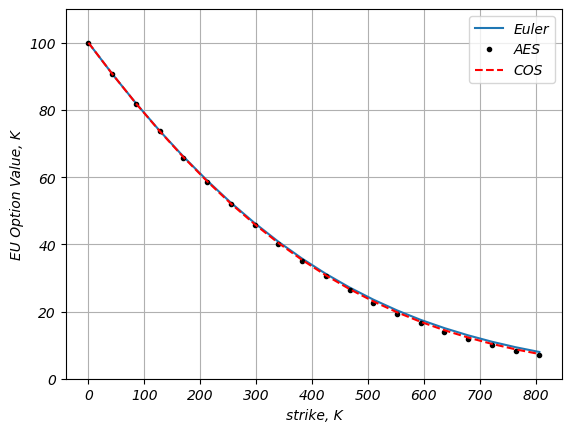

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

import enum


class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0


def CallPutOptionPriceCOSMthd_StochIR(cf, CP, S0, tau, K, N, L, P0T):
    # cf   - characteristic function as a functon, in the book denoted as \varphi
    # CP   - C for call and P for put
    # S0   - Initial stock price
    # tau  - time to maturity
    # K    - list of strikes
    # N    - Number of expansion terms
    # L    - size of truncation domain (typ.:L=8 or L=10)  
    # P0T  - zero-coupon bond for maturity T.

    # reshape K to a column vector
    if K is not np.array:
        K = np.array(K).reshape([len(K), 1])

    # assigning i=sqrt(-1)
    i = 1j
    x0 = np.log(S0 / K)

    # truncation domain
    a = 0.0 - L * np.sqrt(tau)
    b = 0.0 + L * np.sqrt(tau)

    # sumation from k = 0 to k=N-1
    k = np.linspace(0, N - 1, N).reshape([N, 1])
    u = k * np.pi / (b - a)

    # Determine coefficients for Put Prices  
    H_k = CallPutCoefficients(OptionType.PUT, a, b, k)
    mat = np.exp(i * np.outer((x0 - a), u))
    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]
    value = K * np.real(mat.dot(temp))

    # we use call-put parity for call options
    if CP == OptionType.CALL:
        value = value + S0 - K * P0T

    return value


def CallPutCoefficients(CP, a, b, k):
    if CP == OptionType.CALL:
        c = 0.0
        d = b
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k), 1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)
    elif CP == OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a, b, c, d, k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)

    return H_k


def Chi_Psi(a, b, c, d, k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a) / (b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c

    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)), 2.0))
    expr1 = np.cos(k * np.pi * (d - a) / (b - a)) * np.exp(d) - np.cos(k * np.pi
                                                                       * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi *
                                         (d - a) / (b - a)) - k * np.pi / (b - a) * np.sin(k
                                                                                           * np.pi * (c - a) / (
                                                                                                       b - a)) * np.exp(
        c)
    chi = chi * (expr1 + expr2)

    value = {"chi": chi, "psi": psi}
    return value


def EUOptionPriceFromMCPathsGeneralizedStochIR(CP, S, K, T, M):
    result = np.zeros([len(K), 1])
    if CP == OptionType.CALL:
        for (idx, k) in enumerate(K):
            result[idx] = np.mean(1.0 / M * np.maximum(S - k, 0.0))
    elif CP == OptionType.PUT:
        for (idx, k) in enumerate(K):
            result[idx] = np.mean(1.0 / M * np.maximum(k - S, 0.0))
    return result


def CIR_Sample(NoOfPaths, kappa, gamma, vbar, s, t, v_s):
    delta = 4.0 * kappa * vbar / gamma / gamma
    c = 1.0 / (4.0 * kappa) * gamma * gamma * (1.0 - np.exp(-kappa * (t - s)))
    kappaBar = 4.0 * kappa * v_s * np.exp(-kappa * (t - s)) / (gamma * gamma * (1.0 - np.exp(-kappa * (t - s))))
    sample = c * np.random.noncentral_chisquare(delta, kappaBar, NoOfPaths)
    return sample


def GeneratePathsHestonHW_AES(NoOfPaths, NoOfSteps, P0T, T, S_0, kappa, gamma, rhoxr, rhoxv, vbar, v0, lambd, eta):
    # time-step needed for differentiation
    dt = 0.0001
    f0T = lambda t: - (np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2 * dt)

    # Initial interest rate is a forward rate at time t->0
    r0 = f0T(0.00001)
    theta = lambda t: 1.0 / lambd * (f0T(t + dt) - f0T(t - dt)) / (2.0 * dt) + f0T(t) + eta * eta / (
                2.0 * lambd * lambd) * (1.0 - np.exp(-2.0 * lambd * t))

    Z1 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    Z2 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    Z3 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    W2 = np.zeros([NoOfPaths, NoOfSteps + 1])
    W3 = np.zeros([NoOfPaths, NoOfSteps + 1])
    V = np.zeros([NoOfPaths, NoOfSteps + 1])
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    R = np.zeros([NoOfPaths, NoOfSteps + 1])
    M_t = np.ones([NoOfPaths, NoOfSteps + 1])
    R[:, 0] = r0
    V[:, 0] = v0
    X[:, 0] = np.log(S_0)

    time = np.zeros([NoOfSteps + 1])

    dt = T / float(NoOfSteps)
    for i in range(0, NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z1[:, i] = (Z1[:, i] - np.mean(Z1[:, i])) / np.std(Z1[:, i])
            Z2[:, i] = (Z2[:, i] - np.mean(Z2[:, i])) / np.std(Z2[:, i])
            Z3[:, i] = (Z3[:, i] - np.mean(Z3[:, i])) / np.std(Z3[:, i])

        W1[:, i + 1] = W1[:, i] + np.power(dt, 0.5) * Z1[:, i]
        W2[:, i + 1] = W2[:, i] + np.power(dt, 0.5) * Z2[:, i]
        W3[:, i + 1] = W3[:, i] + np.power(dt, 0.5) * Z3[:, i]

        R[:, i + 1] = R[:, i] + lambd * (theta(time[i]) - R[:, i]) * dt + eta * (W1[:, i + 1] - W1[:, i])
        M_t[:, i + 1] = M_t[:, i] * np.exp(0.5 * (R[:, i + 1] + R[:, i]) * dt)

        # Exact samles for the variance process
        V[:, i + 1] = CIR_Sample(NoOfPaths, kappa, gamma, vbar, 0, dt, V[:, i])

        k0 = -rhoxv / gamma * kappa * vbar * dt
        k2 = rhoxv / gamma
        k1 = kappa * k2 - 0.5
        k3 = np.sqrt(1.0 - rhoxr * rhoxr - rhoxv * rhoxv)

        X[:, i + 1] = X[:, i] + k0 + (k1 * dt - k2) * V[:, i] + R[:, i] * dt + k2 * V[:, i + 1] + \
                      + np.sqrt(V[:, i] * dt) * (rhoxr * Z1[:, i] + k3 * Z3[:, i])

        # Moment matching component, i.e.: ensure that E(S(T)/M(T))= S0
        a = S_0 / np.mean(np.exp(X[:, i + 1]) / M_t[:, i + 1])
        X[:, i + 1] = X[:, i + 1] + np.log(a)
        time[i + 1] = time[i] + dt

    # Compute exponent
    S = np.exp(X)
    paths = {"time": time, "S": S, "R": R, "M_t": M_t}
    return paths


def GeneratePathsHestonHWEuler(NoOfPaths, NoOfSteps, P0T, T, S_0, kappa, gamma, rhoxr, rhoxv, vbar, v0, lambd, eta):
    dt = 0.0001
    f0T = lambda t: -(np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2 * dt)

    r0 = f0T(0.00001)

    theta = lambda t: 1.0 / lambd * (f0T(t + dt) - f0T(t - dt)) / (2.0 * dt) + f0T(t) + eta * eta / (
                2.0 * lambd * lambd) * (1.0 - np.exp(-2.0 * lambd * t))

    Z1 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    Z2 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    Z3 = np.random.normal(0.0, 1.0, [NoOfPaths, NoOfSteps])
    W1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    W2 = np.zeros([NoOfPaths, NoOfSteps + 1])
    W3 = np.zeros([NoOfPaths, NoOfSteps + 1])
    V = np.zeros([NoOfPaths, NoOfSteps + 1])
    X = np.zeros([NoOfPaths, NoOfSteps + 1])
    R = np.zeros([NoOfPaths, NoOfSteps + 1])
    M_t = np.ones([NoOfPaths, NoOfSteps + 1])

    R[:, 0] = r0
    V[:, 0] = v0
    X[:, 0] = np.log(S_0)
    time = np.zeros([NoOfSteps + 1])

    dt = T / float(NoOfSteps)
    for i in range(0, NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z1[:, i] = (Z1[:, i] - np.mean(Z1[:, i])) / np.std(Z1[:, i])
            Z2[:, i] = (Z2[:, i] - np.mean(Z2[:, i])) / np.std(Z2[:, i])
            Z3[:, i] = (Z3[:, i] - np.mean(Z3[:, i])) / np.std(Z3[:, i])

        W1[:, i + 1] = W1[:, i] + np.power(dt, 0.5) * Z1[:, i]
        W2[:, i + 1] = W2[:, i] + np.power(dt, 0.5) * Z2[:, i]
        W3[:, i + 1] = W3[:, i] + np.power(dt, 0.5) * Z3[:, i]
        # boundry condition
        R[:, i + 1] = R[:, i] + lambd * (theta(time[i]) - R[:, i]) * dt + eta * (W1[:, i + 1] - W1[:, i])

        M_t[:, i + 1] = M_t[:, i] * np.exp(0.5 * (R[:, i + 1] + R[:, i]) * dt)
        V[:, i + 1] = V[:, i] + kappa * (vbar - V[:, i]) * dt + gamma * np.sqrt(V[:, i]) * (W2[:, i + 1] - W2[:, i])
        V[:, i + 1] = np.maximum(V[:, i + 1], 0.0)
        term1 = rhoxr * (W1[:, i + 1] - W1[:, i]) + rhoxv * (W2[:, i + 1] - W2[:, i]) \
                + np.sqrt(1.0 - rhoxr * rhoxr - rhoxv * rhoxv) * (W3[:, i + 1] - W3[:, i])

        X[:, i + 1] = X[:, i] + (R[:, i] - 0.5 * V[:, i]) * dt + np.sqrt(V[:, i]) * term1
        time[i + 1] = time[i] + dt
        # martingalitily scheck
        a = S_0 / np.mean(np.exp(X[:, i + 1]) / M_t[:, i + 1])
        X[:, i + 1] = X[:, i + 1] + np.log(a)

        S = np.exp(X)
    paths = {"time": time, "S": S, "R": R, "M_t": M_t}
    return paths


# Exact expectation E(sqrt(V(t)))
def meanSqrtV_3(kappa, v0, vbar, gamma):
    delta = 4.0 * kappa * vbar / gamma / gamma
    c = lambda t: 1.0 / (4.0 * kappa) * gamma * gamma * (1.0 - np.exp(-kappa * (t)))
    kappaBar = lambda t: 4.0 * kappa * v0 * np.exp(-kappa * t) / (gamma * gamma * (1.0 - np.exp(-kappa * t)))
    temp1 = lambda t: np.sqrt(2.0 * c(t)) * sp.gamma((1.0 + delta) / 2.0) / sp.gamma(delta / 2.0) * sp.hyp1f1(-0.5,
                                                                                                              delta / 2.0,
                                                                                                              -kappaBar(
                                                                                                                  t) / 2.0)
    return temp1


def C_H1HW(u, tau, lambd):
    i = 1j
    C = (i * u - 1.0) / lambd * (1 - np.exp(-lambd * tau))
    return C


def D_H1HW(u, tau, kappa, gamma, rhoxv):
    i = 1j

    D1 = np.sqrt(np.power(kappa - gamma * rhoxv * i * u, 2) + (u * u + i * u) * gamma * gamma)
    g = (kappa - gamma * rhoxv * i * u - D1) / (kappa - gamma * rhoxv * i * u + D1)
    C = (1.0 - np.exp(-D1 * tau)) / (gamma * gamma * (1.0 - g * np.exp(-D1 * tau))) \
        * (kappa - gamma * rhoxv * i * u - D1)
    return C


def A_H1HW(u, tau, P0T, lambd, eta, kappa, gamma, vbar, v0, rhoxv, rhoxr):
    i = 1j
    D1 = np.sqrt(np.power(kappa - gamma * rhoxv * i * u, 2) + (u * u + i * u) * gamma * gamma)
    g = (kappa - gamma * rhoxv * i * u - D1) / (kappa - gamma * rhoxv * i * u + D1)

    # function theta(t)
    dt = 0.0001
    f0T = lambda t: - (np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2.0 * dt)
    theta = lambda t: 1.0 / lambd * (f0T(t + dt) - f0T(t - dt)) / (2.0 * dt) + f0T(t) + eta * eta / (
                2.0 * lambd * lambd) * (1.0 - np.exp(-2.0 * lambd * t))

    # Integration in the function I_1
    N = 500
    z = np.linspace(0, tau - 1e-10, N)
    f1 = (1.0 - np.exp(-lambd * z)) * theta(tau - z)
    value1 = np.trapz(f1, z)

    # Note that I_1_adj also allows for theta to be time-dependent
    # therefore it is not exactly the same as given in the book
    I_1_adj = (i * u - 1.0) * value1
    I_2 = tau / (gamma ** 2.0) * (kappa - gamma * rhoxv * i * u - D1) - 2.0 / (gamma ** 2.0) * np.log(
        (1.0 - g * np.exp(-D1 * tau)) / (1.0 - g))
    I_3 = 1.0 / (2.0 * np.power(lambd, 3.0)) * np.power(i + u, 2.0) * (
                3.0 + np.exp(-2.0 * lambd * tau) - 4.0 * np.exp(-lambd * tau) - 2.0 * lambd * tau)

    meanSqrtV = meanSqrtV_3(kappa, v0, vbar, gamma)
    f2 = meanSqrtV(tau - z) * (1.0 - np.exp(-lambd * z))
    value2 = np.trapz(f2, z)
    I_4 = -1.0 / lambd * (i * u + u ** 2.0) * value2

    return I_1_adj + kappa * vbar * I_2 + 0.5 * eta ** 2.0 * I_3 + eta * rhoxr * I_4


def ChFH1HWModel(P0T, lambd, eta, tau, kappa, gamma, vbar, v0, rhoxv, rhoxr):
    # Determine initial interest rate r(0)
    dt = 0.0001
    f0T = lambda t: - (np.log(P0T(t + dt)) - np.log(P0T(t - dt))) / (2.0 * dt)
    r0 = f0T(0.00001)
    C = lambda u: C_H1HW(u, tau, lambd)
    D = lambda u: D_H1HW(u, tau, kappa, gamma, rhoxv)
    A = lambda u: A_H1HW(u, tau, P0T, lambd, eta, kappa, gamma, vbar, v0, rhoxv, rhoxr)
    cf = lambda u: np.exp(A(u) + C(u) * r0 + D(u) * v0)
    return cf


def mainCalculation():
    CP = OptionType.CALL

    NoOfPaths = 10000
    NoOfSteps = 500

    # HW model settings
    lambd = 1.12
    eta = 0.01
    S0 = 100.0
    T = 15.0
    r = 0.1

    # Strike range
    K = np.linspace(.01, 1.8 * S0 * np.exp(r * T), 20)
    K = np.array(K).reshape([len(K), 1])

    # We define a ZCB curve (obtained from the market)
    P0T = lambda T: np.exp(-r * T)

    # Settings for the COS method
    N = 2000
    L = 15

    gamma = 0.3
    vbar = 0.05
    v0 = 0.02
    rhoxr = 0.5
    rhoxv = -0.8
    kappa = 0.5

    np.random.seed(1)
    paths = GeneratePathsHestonHWEuler(NoOfPaths, NoOfSteps, P0T, T, S0, kappa, gamma, rhoxr, rhoxv, vbar, v0, lambd,
                                       eta)
    S = paths["S"]
    M_t = paths["M_t"]

    print("martignale property for MCpaths " ,np.mean(S[:, -1] / M_t[:, -1]))
    valueOptMC = EUOptionPriceFromMCPathsGeneralizedStochIR(CP, S[:, -1], K, T, M_t[:, -1])

    np.random.seed(1)
    pathsExact = GeneratePathsHestonHW_AES(NoOfPaths, NoOfSteps, P0T, T, S0, kappa, gamma, rhoxr, rhoxv, vbar, v0,
                                           lambd, eta)
    S_ex = pathsExact["S"]
    M_t_ex = pathsExact["M_t"]
    valueOptMC_ex = EUOptionPriceFromMCPathsGeneralizedStochIR(CP, S_ex[:, -1], K, T, M_t_ex[:, -1])

    print("martignale property for AES " ,np.mean(S_ex[:, -1] / M_t_ex[:, -1]))

    plt.figure(1)
    plt.plot(K, valueOptMC)
    plt.plot(K, valueOptMC_ex, '.k')
    plt.ylim([0.0, 110.0])

    # The COS method
    cf2 = ChFH1HWModel(P0T, lambd, eta, T, kappa, gamma, vbar, v0, rhoxv, rhoxr)
    u = np.array([1.0, 2.0, 3.0])
    print(cf2(u))
    valCOS = CallPutOptionPriceCOSMthd_StochIR(cf2, CP, S0, T, K, N, L, P0T(T))
    plt.plot(K, valCOS, '--r')
    plt.legend(['Euler', 'AES', 'COS'])
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('EU Option Value, K')
    print("Value from the COS method:")
    print(valCOS)


mainCalculation()












